In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
def ExpuLJ(r, r0, kbt):
    return np.exp(-(4*((r0/r)**12 - (r0/r)**6)/kbt))

def uLJ(r, r0, kbt):
    return 4*((r0/r)**12 - (r0/r)**6)

In [45]:
# Create the range of r and values of KbT
r = np.linspace(0.1, 10, 100)
kbt = [1, 2, 5, 10]

# Calculate <r> for both the LJ potential (y) and the Exp LJ potential (y2)
y = [uLJ(r, r0=1, kbt=i) for i in kbt]
y2 = [ExpuLJ(r, r0=1, kbt=i) for i in kbt]

# Turn to arrays
y = np.array(y)
y2 = np.array(y2)

# y stats (regular potential function)
y_mean = np.mean(y, axis=1)
y_variance = np.var(y, axis = 1)

# y2 stats (exponential potential function)
y2_mean = np.mean(y2, axis = 1)
y2_variance = np.var(y2, axis = 1)

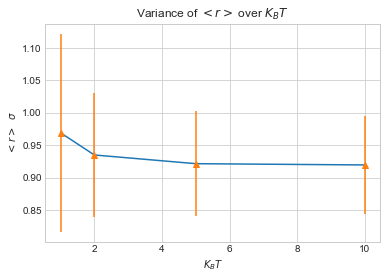

In [53]:
# Plot the mean and variance of the exponential LJ Potential Function
plt.plot(kbt, y2_mean)
plt.xlabel('$K_{B}T$')
plt.ylabel('$<r>$  $\sigma$');
plt.title('Variance of $<r>$ over $K_{B}T$')
plt.errorbar(kbt, y2_mean, y2_variance, linestyle='None', marker='^');
plt.savefig("varianceLJoverKBT.png", dpi = 300)

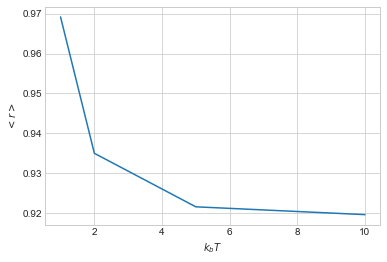

In [54]:
plt.plot(kbt, y2_mean)

plt.ylabel('$<r>$')
plt.xlabel('$k_{b}T$')
plt.savefig('r_values_by_kbt.png', dpi=300)

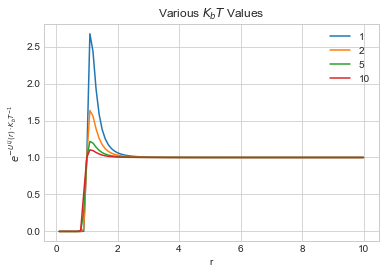

In [55]:
for i in range(len(kbt)):
    plt.plot(r, y2[i, :])
    #plt.hlines(y2_mean, xmin=0.9, xmax=2)
    plt.legend(kbt)
plt.title('Various $K_{b}T$ Values')
plt.xlabel('r')
plt.ylabel('$e^{-U^{LJ}(r) \cdot K_{b}T^{-1}}$');
plt.savefig('LJ_Graph1.png', dpi=300)

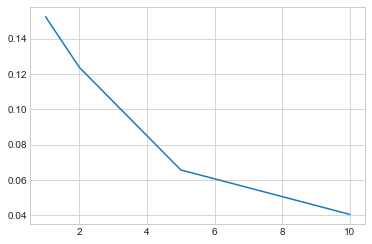

In [96]:
plt.plot(kbt, np.add.accumulate(y2_variance)/kbt)

In [79]:
y2_variance

array([0.15241844, 0.09501404, 0.08047155, 0.07589947])

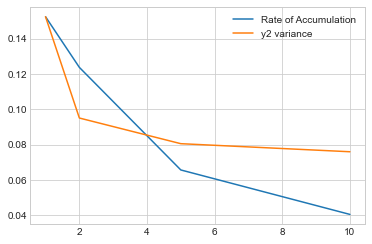

In [99]:
plt.plot(kbt, (np.add.accumulate(y2_variance)/kbt), kbt, y2_variance)
plt.legend(['Rate of Accumulation', 'y2 variance'])